<a href="https://colab.research.google.com/github/fquinterov/computer_vision_course/blob/main/computer_vision_exam_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Computer vision Exam #2

Fernando Quintero    
Universidad Tecnológica de Bolívar    

This is the second exam of the computer vision course in Universidad Tecnológica de Bolívar. The exam consists of two exercises:

- Connected components and morphological operations
- Filters in Fourier spectrum

Each exercise is weighted equally, with 2.5 points assigned to each, contributing to a total of 5 points for this part of the exam. Please ensure that you carefully read and address all questions.

Good luck!

In [ ]:
# Please fill in these lines with your student information
# Name:
# Code: T000XXXXX

### Import libraries

In [1]:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow # for image display
from skimage import io
from PIL import Image
import matplotlib.pylab as plt
import urllib.request

## Exercise 1 (connected components and morphological operations)


Upload a picture of rice grains

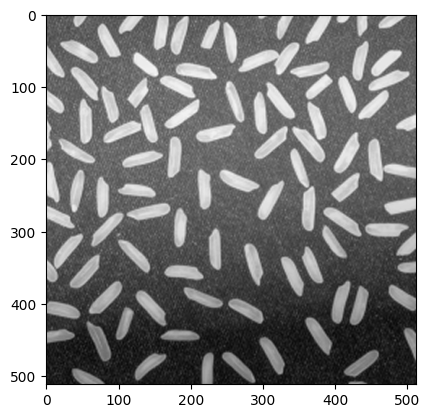

In [2]:
IMAGE_URL = 'https://raw.githubusercontent.com/fquinterov/computer_vision_course/main/resources/images/rice.png'

urllib.request.urlretrieve(IMAGE_URL, 'rice.png')

rice = cv2.imread('rice.png')

img_rice = cv2.cvtColor(rice, cv2.COLOR_BGR2GRAY)
plt.imshow(img_rice, cmap = 'gray')
plt.show()

**TODO: Count how many grains of rice are in the image.** OBVIOUSLY USING REGION LABELS 😀

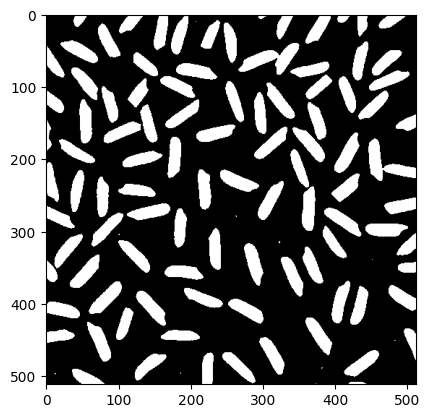

In [3]:
# YOUR CODE GOES HERE
#
#
#
#

# This function will give you an initial binarized image by implementing an adaptive threshold.
output_adapthresh = cv2.adaptiveThreshold (img_rice, 255.0, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 51, -20.0)
plt.imshow(output_adapthresh, cmap = 'gray')
plt.show()

## Exercise 2 (filters with Fourier transform)


Upload a picture of the university

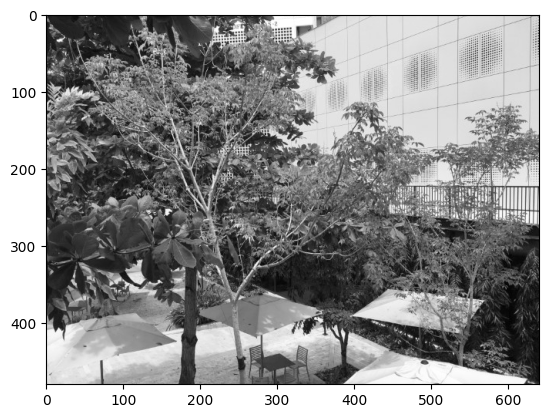

In [ ]:
IMAGE_URL = 'https://github.com/agmarrugo/computer-vision-utb/raw/main/data/utb-alcatraz.jpg'

urllib.request.urlretrieve(IMAGE_URL, 'utb.png')

utb = cv2.imread('utb.png')

img_utb = cv2.cvtColor(utb, cv2.COLOR_BGR2GRAY)
plt.imshow(img_utb, cmap = 'gray')
plt.show()

**TODO: Compute the Fourier spectrum of the previously loaded image. (hint: use the functions `np.fft.fft2` and `np.fft.fftshift`)**

In [ ]:
# YOUR CODE GOES HERE
#
#
#
#

The following functions allow us to produce a High-pass and Low-pass filter.

In [ ]:
def distance(point1,point2):
    return np.sqrt((point1[0]-point2[0])**2 + (point1[1]-point2[1])**2)

def gaussianLP(D0,imgShape):
    base = np.zeros(imgShape[:2])
    rows, cols = imgShape[:2]
    center = (rows/2,cols/2)
    for x in range(cols):
        for y in range(rows):
            base[y,x] = np.exp(((-distance((y,x),center)**2)/(2*(D0**2))))
    return base

def gaussianHP(D0,imgShape):
    base = np.zeros(imgShape[:2])
    rows, cols = imgShape[:2]
    center = (rows/2,cols/2)
    for x in range(cols):
        for y in range(rows):
            base[y,x] = 1 - np.exp(((-distance((y,x),center)**2)/(2*(D0**2))))
    return base

Next, we show the Gaussian low pass filter and a Highpass filter.

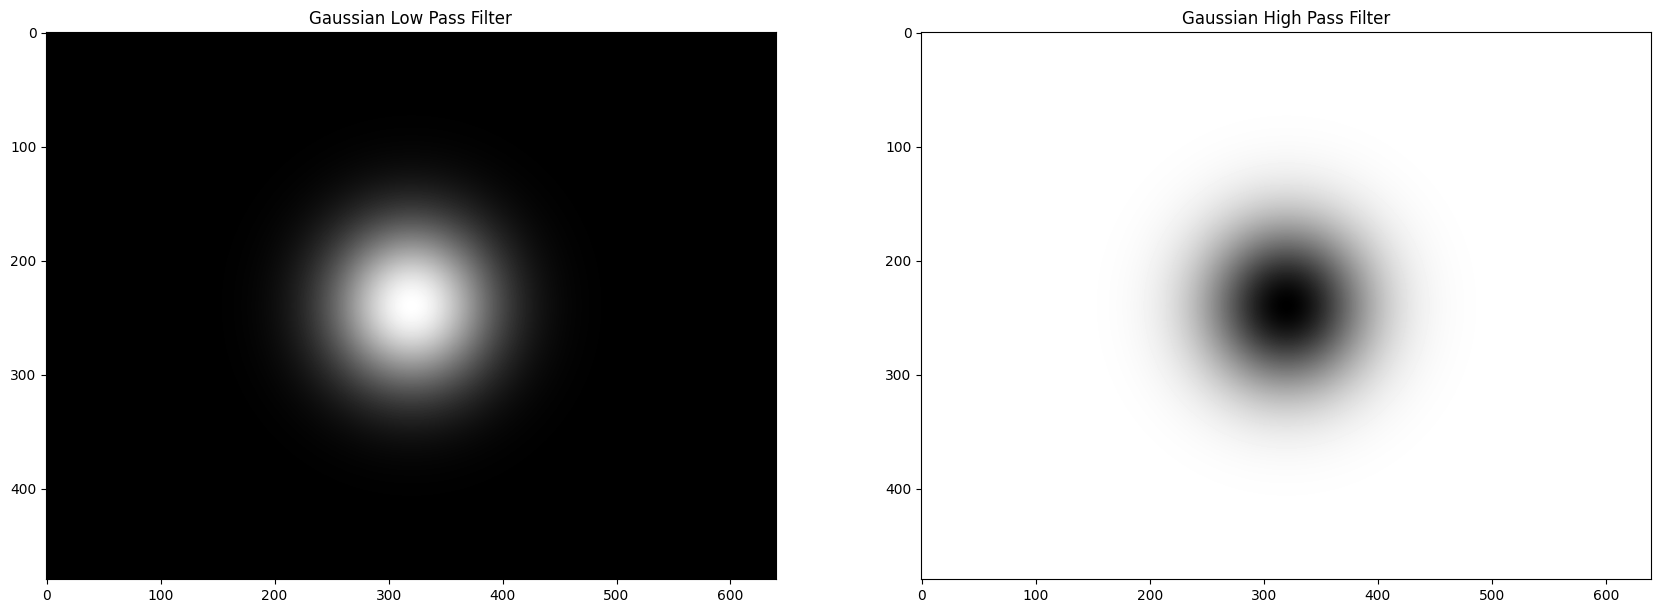

In [ ]:
plt.figure(figsize=(6.4*5, 4.8*5), constrained_layout=False)

LowPass = gaussianLP(50,img_utb.shape)
plt.subplot(131), plt.imshow(LowPass, "gray"), plt.title("Gaussian Low Pass Filter")

HighPass = gaussianHP(50,img_utb.shape)
plt.subplot(132), plt.imshow(HighPass, "gray"), plt.title("Gaussian High Pass Filter")

plt.show()

**TODO: Filter the image with the above filters. Remember that filtering in the FFT domain is simple multiplication. # Tip: to get a meaningful image, you have to use `np.fft.ifftshift` after the spectra multiplication.**

**You should already have the FFT of the UTB image from previous TODO**

In [ ]:
# YOUR CODE GOES HERE
#
#
#
#